In [2]:
import FnConeCone as fcc
import rasterio as rs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)

# Case Study : MAYON volcano

To illustrate the ability of ConeCone to reconstruct both the center and the general shape of a volcano, here we use the Mayon volcano

## -1- Load Mayon DEM (UTM)

(Rasterio is not mandatoty to use ConeCone, it is just easy to work with raster data) 

In [3]:
## DEM MAYON
Mayon=rs.open('Mayon_MNT_UTM_51N.tif')
Mayon_z=Mayon.read(1)
extent_Mayon=[Mayon.bounds[0],Mayon.bounds[2],Mayon.bounds[1],Mayon.bounds[3]]
Mayon_z[Mayon_z<0]=np.nan

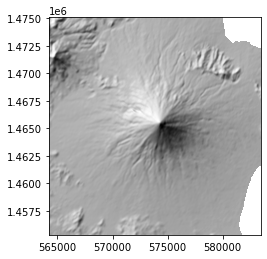

In [4]:
plt.figure()
plt.imshow(ls.hillshade(Mayon_z, vert_exag=0.01), cmap='gray', extent=extent_Mayon)
plt.show()

## -2-  "Control Points"

To estimate the center and the general shape of a volano we need Control Points. Control points are located on the remnants of the colcano we seek to reconstruct. Here, as an example we use altitudinal profiles around the summit.

For each control point we use X,Y coordinates (in UTM for ConeCone) and Z (elevation in m)

In [5]:
## CONTROL POINTS
xc,yc,zc=np.loadtxt('XYZ_ControlPoint_MayonUTM_51N.csv',delimiter=',', unpack=True, skiprows=1)

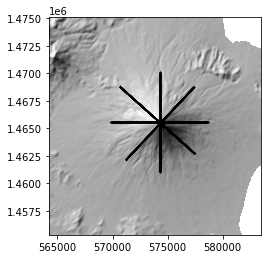

In [6]:
plt.figure()
plt.imshow(ls.hillshade(Mayon_z, vert_exag=0.01), cmap='gray', extent=extent_Mayon)
plt.plot(xc,yc,'ok', ms=0.5)
plt.show()

## -3- "Initial Guess"

ConeCone looks, all over the DEM, for the Best Center of the volcano. 

- First it calculates the distance between all the Control Points and the potential Best Center
- Second it tests the Spearman Correaltion and the Linear Regression between the distance it just calculated and the elevation of each Control Points.
- Finally, 2 Best Centers are gicen, one with the best Spearmann coeficient, the other with the best Linear Regression Coefficient 

HOWEVER, using __fmin__ from __scipy.optimize__ ConeCone needs an initial guess. For this example the initial guess is located at the bottom of the volcano

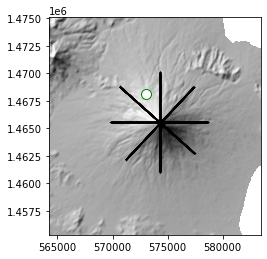

In [7]:
initialguessX=573070
initialguessY=1468161

plt.figure()
plt.imshow(ls.hillshade(Mayon_z, vert_exag=0.01), cmap='gray', extent=extent_Mayon)
plt.plot(xc,yc,'ok', ms=0.5)
plt.plot(initialguessX,initialguessY, marker='o', c='w', mec='g', ms=10)
plt.show()

## -4- ConeCone in action

In [8]:
Center_results=fcc.conecone_CenterProfile(xc,yc,zc,initialguessX,initialguessY)
print(Center_results)

{'BestCenter_LR_xy': array([ 574259.07526354, 1465566.61382156]), 'RadiusModel_controlPoint_LR': array([1.90276913e+00, 8.20021624e+00, 1.70793735e+01, ...,
       4.84369298e+03, 4.85258296e+03, 4.86154700e+03]), 'Elevation_controlPoint_LR': array([2380.46094, 2380.46094, 2380.46094, ...,  495.80801,  495.80801,
        495.80801]), 'BestCenter_Sp_xy': array([ 574256.01430032, 1465575.41677145]), 'RadiusModel_controlPoint_Sp': array([2.87091402e+00, 9.28957320e+00, 9.44806701e+00, ...,
       4.83554865e+03, 4.84443865e+03, 4.85340265e+03]), 'Elevation_controlPoint_Sp': array([2380.46094, 2380.46094, 2380.46094, ...,  495.80801,  495.80801,
        495.80801])}


## -5- Location of the Center of the Volano

- Center given by Linear Regression is shown as a Red circle
- Center given by Spearman's Correlation is shown as a Blue cross

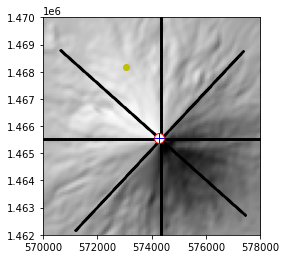

In [9]:
plt.figure()
plt.imshow(ls.hillshade(Mayon_z, vert_exag=0.01), cmap='gray', extent=extent_Mayon)
plt.plot(xc,yc,'ok', ms=1)
plt.plot(initialguessX,initialguessY, 'oy')
plt.plot(Center_results['BestCenter_LR_xy'][0],Center_results['BestCenter_LR_xy'][1], marker='o', c='w', mec='r', ms=10)
plt.plot(Center_results['BestCenter_Sp_xy'][0],Center_results['BestCenter_Sp_xy'][1], '+b', ms=10)
plt.xlim(570000,578000)
plt.ylim(1462000,1470000)
plt.show()

## -6- General Shape of the volcano

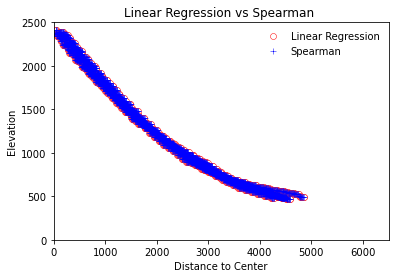

In [10]:
plt.figure()
plt.title('Linear Regression vs Spearman ')
plt.plot(Center_results['RadiusModel_controlPoint_LR'], Center_results['Elevation_controlPoint_LR'],'ow', mec='r', mew=0.5, label='Linear Regression')
plt.plot(Center_results['RadiusModel_controlPoint_Sp'], Center_results['Elevation_controlPoint_Sp'] ,'+', mec='b', mew=0.5,label='Spearman')
plt.xlabel('Distance to Center')
plt.ylabel('Elevation')
plt.legend(frameon=False)
plt.xlim(0,6500)
plt.ylim(0,2500)
plt.show()